In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2021-07-13 15:54:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-13 15:54:47 (105 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback , plot_loss_curves , unzip_data , walk_through_dir

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2021-07-13 15:54:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   149MB/s    in 1.1s    

2021-07-13 15:54:52 (149 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [6]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"


In [7]:
import tensorflow as tf

IMG_SIZE =(224 , 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
                                                                       directory = train_dir , 
                                                                       image_size = IMG_SIZE , 
                                                                       label_mode = "categorical" ,
                                                                       batch_size = 32
    
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
                                                                       directory = test_dir , 
                                                                       image_size = IMG_SIZE , 
                                                                       label_mode = "categorical" ,
                                                                       batch_size = 32
    
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [9]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
for images , labels in train_data_10_percent.take(1):
  print(images , labels)

tf.Tensor(
[[[[2.11658173e+02 1.72658173e+02 1.29658173e+02]
   [2.27117355e+02 1.90025513e+02 1.46071442e+02]
   [2.27357147e+02 1.93571426e+02 1.48571426e+02]
   ...
   [2.49918381e+02 1.54285751e+02 4.94949265e+01]
   [2.49311218e+02 1.59688828e+02 5.29285965e+01]
   [2.49586716e+02 1.64556168e+02 5.61428909e+01]]

  [[2.15688782e+02 1.74163254e+02 1.28591843e+02]
   [2.24061218e+02 1.85928574e+02 1.40862259e+02]
   [2.25729599e+02 1.89556122e+02 1.44500000e+02]
   ...
   [2.45857162e+02 1.46000015e+02 3.44438744e+01]
   [2.45275528e+02 1.49372467e+02 3.77806473e+01]
   [2.45785675e+02 1.52188843e+02 4.18571777e+01]]

  [[2.19801025e+02 1.75785706e+02 1.26433670e+02]
   [2.23785721e+02 1.81658173e+02 1.33158173e+02]
   [2.26045914e+02 1.88306122e+02 1.41260208e+02]
   ...
   [2.47260193e+02 1.43428574e+02 2.79234562e+01]
   [2.47000000e+02 1.42770401e+02 2.93877602e+01]
   [2.44933640e+02 1.42076508e+02 3.15714283e+01]]

  ...

  [[1.48928543e+02 1.55505112e+02 1.92647995e+02]
   [1

In [11]:
 base_model = tf.keras.applications.EfficientNetB0(include_top=False)

 base_model.trainable = False

 inputs = tf.keras.layers.Input(shape=(224 , 224 , 3) , name="input_layer")

 #x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255)(inputs)

 x = base_model(inputs)
 print(f"shape after passing nput through base model : {x.shape}")

 x =tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
 print(f"shape after passing GlobalAveragePooling : {x.shape}")

 outputs= tf.keras.layers.Dense(10 , activation="softmax" , name = "output_layer")(x)

 model_0 = tf.keras.Model(inputs , outputs)

 model_0.compile(loss= "categorical_crossentropy" , 
                 optimizer = tf.keras.optimizers.Adam() , 
                 metrics=["accuracy"])
 
 history_10_percent = model_0.fit(train_data_10_percent , 
             epochs = 5 , 
             steps_per_epoch = len(train_data_10_percent) , 
             validation_data = test_data , 
             validation_steps = int(0.25*len(test_data)) , 
             callbacks= [create_tensorboard_callback(dir_name="transfer_learning" , 
                                                     experiment_name = "10_percent_feature_extraction")]
              )

16711680/16705208 [==============================] - 0s 0us/step
shape after passing nput through base model : (None, 7, 7, 1280)
shape after passing GlobalAveragePooling : (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20210713-155503
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 42s 308ms/step - loss: 1.8992 - accuracy: 0.4147 - val_loss: 1.3302 - val_accuracy: 0.7319
Epoch 2/5
24/24 [==============================] - 5s 197ms/step - loss: 1.1457 - accuracy: 0.7360 - val_loss: 0.9271 - val_accuracy: 0.7763
Epoch 3/5
24/24 [==============================] - 5s 197ms/step - loss: 0.8364 - accuracy: 0.8000 - val_loss: 0.7497 - val_accuracy: 0.8306
Epoch 4/5
24/24 [==============================] - 5s 206ms/step - loss: 0.6840 - accuracy: 0.8440 - val_loss: 0.6966 - val_accuracy: 0.8207
Epoch 5/5
24/24 [==============================] - 5s 197ms/step - loss: 0.5954 - accuracy: 0.8587 - val_loss: 0.6294 - val_accuracy: 0.8421


In [12]:
model_0.evaluate(test_data)

79/79 [==============================] - 9s 111ms/step - loss: 0.6118 - accuracy: 0.8388


[0.6117696166038513, 0.8388000130653381]

In [13]:
for layer_number , layer in enumerate(base_model.layers):
  
  print(layer_number , layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [14]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [15]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

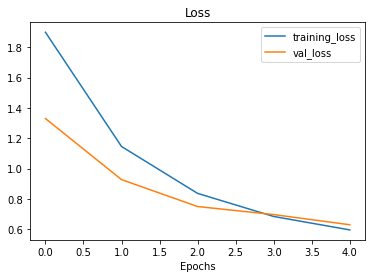

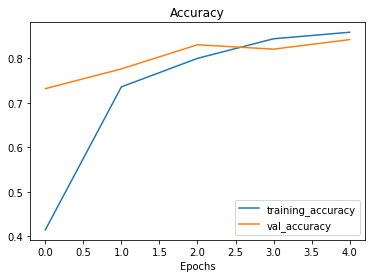

In [16]:
 plot_loss_curves(history_10_percent)

In [17]:
input_shape = (1 ,4 , 4 , 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"random input tensor \n {input_tensor}")

random input tensor 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]


In [18]:
input_shape = (1 , 4 , 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"random input tensor \n {input_tensor}")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"global average pooled tensor \n {global_average_pooled_tensor}")

random input tensor 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]
global average pooled tensor 
 [[-0.09368646 -0.45840448 -0.2885598 ]]


In [19]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2021-07-13 15:56:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   208MB/s    in 0.6s    

2021-07-13 15:56:26 (208 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [20]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [21]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There a

In [22]:
IMG_SIZE = (224 , 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory( train_dir_1_percent ,
                                                                           label_mode = "categorical" , 
                                                                           image_size = IMG_SIZE , 
                                                                           batch_size = 32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir , 
                                                                label_mode = "categorical" , 
                                                                image_size = IMG_SIZE , 
                                                                batch_size = 32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [24]:
data_augmentation = keras.Sequential([
                                      preprocessing.RandomFlip("horizontal"),
                                      preprocessing.RandomRotation(0.2) , 
                                      preprocessing.RandomZoom(0.2)  , 
                                      preprocessing.RandomHeight(0.2) , 
                                      preprocessing.RandomWidth(0.2) , 


] , name="data_augmentation" )

In [25]:
import matplotlib.pyplot as plt
import os 
import random
import matplotlib.image as mpimg

Text(0.5, 1.0, 'augmented : pizza')

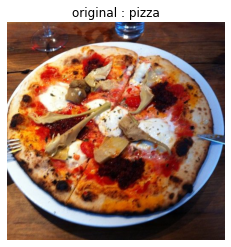

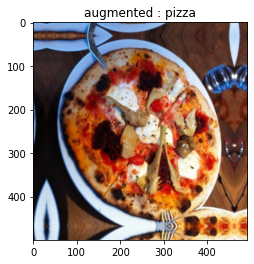

In [26]:
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir +"/"+random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"original : {target_class}")
plt.axis(False);

augmented_img = data_augmentation(tf.expand_dims(img , axis = 0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255)
plt.title(f"augmented : {target_class}")


In [27]:
input_shape  =(224 , 224 , 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False 

inputs = layers.Input(shape = input_shape , name = "input_layer")

x = data_augmentation(inputs)

x = base_model(  x , training = False)

x = layers.GlobalAveragePooling2D(name = "global_pool_avg_layer")(x)

outputs = layers.Dense(10 , activation = "softmax" , name = "output_layer")(x)



In [28]:
model_1 = keras.Model(inputs , outputs)

model_1.compile(loss="categorical_crossentropy" , 
                optimizer=tf.keras.optimizers.Adam() , 
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data_1_percent , 
                        epochs = 5, 
                        steps_per_epoch = len(train_data_1_percent) , 
                        validation_data = test_data , 
                        validation_steps = int(0.25*len(test_data)) , 
)

Epoch 1/5
3/3 [==============================] - 10s 2s/step - loss: 2.4370 - accuracy: 0.0286 - val_loss: 2.2225 - val_accuracy: 0.1612
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1521 - accuracy: 0.1286 - val_loss: 2.1023 - val_accuracy: 0.2615
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9366 - accuracy: 0.3571 - val_loss: 2.0042 - val_accuracy: 0.3405
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.8288 - accuracy: 0.4857 - val_loss: 1.9088 - val_accuracy: 0.4046
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6626 - accuracy: 0.5714 - val_loss: 1.8265 - val_accuracy: 0.4638


In [29]:
history_1 = model_1.fit(train_data_1_percent , 
                        epochs = 4, 
                        steps_per_epoch = len(train_data_1_percent) , 
                        validation_data = test_data , 
                        validation_steps = int(0.25*len(test_data)) , 
                        callbacks = [create_tensorboard_callback(dir_name="transfer_learning" , 
                                     experiment_name="1_percent_data_aug")]
)

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20210713-155700
Epoch 1/4


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 5s 2s/step - loss: 1.5354 - accuracy: 0.6571 - val_loss: 1.7401 - val_accuracy: 0.5099
Epoch 2/4
3/3 [==============================] - 3s 1s/step - loss: 1.3633 - accuracy: 0.8000 - val_loss: 1.6874 - val_accuracy: 0.5247
Epoch 3/4
3/3 [==============================] - 4s 2s/step - loss: 1.2758 - accuracy: 0.8286 - val_loss: 1.5973 - val_accuracy: 0.5576
Epoch 4/4
3/3 [==============================] - 4s 2s/step - loss: 1.1601 - accuracy: 0.8857 - val_loss: 1.5433 - val_accuracy: 0.5773


In [30]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_pool_avg_layer (Globa (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [31]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 9s 105ms/step - loss: 1.5498 - accuracy: 0.5768


[1.549789547920227, 0.5767999887466431]

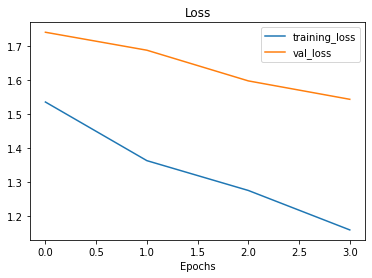

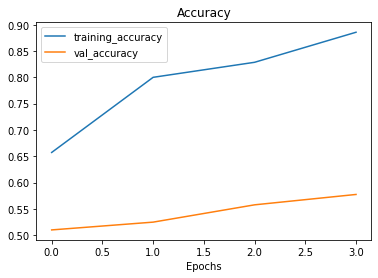

In [32]:
plot_loss_curves(history_1)

In [33]:
train_dir_10_percent= "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [34]:
import tensorflow as tf

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent , 
                                                                            label_mode = "categorical" , 
                                                                            image_size = (224 , 224) ) 
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir , 
                                                                label_mode = "categorical" , 
                                                                image_size = (224 , 224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [35]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
                                preprocessing.RandomFlip("horizontal") , 
                                preprocessing.RandomHeight(0.2) , 
                                preprocessing.RandomRotation(0.2) ,
                                preprocessing.RandomWidth(0.2) , 
                                preprocessing.RandomZoom(0.2)
] , name ="data_augmentation")

input_shape = (224 ,224 , 3)

base_model = tf.keras.applications.EfficientNetB4(include_top=False)
base_model.trainable=False
inputs = layers.Input(shape = input_shape , name="input_layer")
x = data_augmentation(inputs)
x = base_model(x , training=False)
x = layers.GlobalAveragePooling2D(name = "global_avg_layer")(x)

outputs = layers.Dense(10 , activation = "softmax" , name="output_layer")(x)
model_2 = tf.keras.Model(inputs , outputs)

model_2.compile(loss="categorical_crossentropy" , 
                optimizer=tf.keras.optimizers.Adam() , 
                metrics = ["accuracy"])




71688192/71686520 [==============================] - 1s 0us/step


In [36]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path , 
                                                         save_weights_only = True , 
        
                                                         save_best_only = False , 
                                                         save_freq = "epoch" , 
                                                         verbose =1)

In [37]:
initial_epochs = 5 
history_10_percent_data_aug = model_2.fit(train_data_10_percent , 
                                          epochs = initial_epochs , 
                                          validation_data = test_data , 
                                          validation_steps = int(0.25*len(test_data)) , 
                                          callbacks= [create_tensorboard_callback(dir_name="transfer_learning" ,
                                                                                  experiment_name = "10_percent_data_aug") , 
                                                      checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20210713-155736
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 37s 1s/step - loss: 1.8937 - accuracy: 0.4160 - val_loss: 1.3039 - val_accuracy: 0.7451

Epoch 00001: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 20s 825ms/step - loss: 1.2476 - accuracy: 0.6867 - val_loss: 0.8943 - val_accuracy: 0.7862

Epoch 00002: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 19s 750ms/step - loss: 1.0080 - accuracy: 0.7373 - val_loss: 0.7782 - val_accuracy: 0.8026

Epoch 00003: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 17s 690ms/step - loss: 0.8766 - accuracy: 0.7627 - val_loss: 0.6748 - val_accuracy: 0.8158

Epoch 00004: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 5/5
24/24 [==============================] - 18s 748ms/step - loss: 0.7543 - accuracy: 0.8000 - val_los

In [38]:
model_0.evaluate(test_data)

79/79 [==============================] - 9s 107ms/step - loss: 0.6118 - accuracy: 0.8388


[0.6117695569992065, 0.8388000130653381]

In [39]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug


79/79 [==============================] - 16s 203ms/step - loss: 0.6324 - accuracy: 0.8220


[0.6324488520622253, 0.8220000267028809]

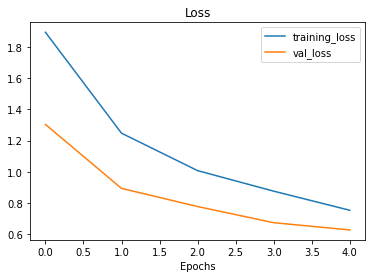

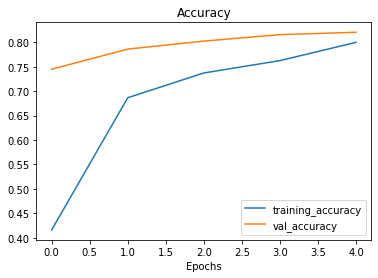

In [40]:
plot_loss_curves(history_10_percent_data_aug)

In [41]:
model_2.load_weights(checkpoint_path)  #loading in chckpoint weights

In [42]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 16s 194ms/step - loss: 0.6324 - accuracy: 0.8220


In [43]:
results_10_percent_data_aug

[0.6324488520622253, 0.8220000267028809]

In [44]:
loaded_weights_model_results

[0.6324489116668701, 0.8220000267028809]

In [45]:
import numpy as np 
np.isclose(np.array(results_10_percent_data_aug) , np.array(loaded_weights_model_results))

array([ True,  True])

In [46]:
 model_2.layers

In [47]:
for layer in model_2.layers:
  print(layer , layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fcb8a750b90> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fcb8a750c10> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7fca8e411490> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7fca8ef49090> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fca8e316d10> True


In [48]:
for  i , layer in enumerate(model_2.layers[2].layers):
 print(i , layer.name , layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block1b_dwconv False
18 block1b_bn False
19 block1b_activation False
20 block1b_se_squeeze False
21 block1b_se_reshape False
22 block1b_se_reduce False
23 block1b_se_expand False
24 block1b_se_excite False
25 block1b_project_conv False
26 block1b_project_bn False
27 block1b_drop False
28 block1b_add False
29 block2a_expand_conv False
30 block2a_expand_bn False
31 block2a_expand_activation False
32 block2a_dwconv_pad False
33 block2a_dwconv False
34 block2a_bn False
35 block2a_activation False
36 block2a_se_squeeze False
37 block2a_se_reshape False
38 block2a_se_reduce False
39 block2a_s

In [49]:
print(len(model_2.layers[2].trainable_variables))

0


In [50]:
base_model.trainable = True 

for layer in base_model.layers[:-10]:
  layer.trainable = False

In [51]:
model_2.compile(loss = "categorical_crossentropy" , 
                optimizer =tf.keras.optimizers.Adam(lr = 0.0001) , 
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [52]:
for layer_number , layer in enumerate(model_2.layers[2].layers):
  print(layer_number , layer.name , layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block1b_dwconv False
18 block1b_bn False
19 block1b_activation False
20 block1b_se_squeeze False
21 block1b_se_reshape False
22 block1b_se_reduce False
23 block1b_se_expand False
24 block1b_se_excite False
25 block1b_project_conv False
26 block1b_project_bn False
27 block1b_drop False
28 block1b_add False
29 block2a_expand_conv False
30 block2a_expand_bn False
31 block2a_expand_activation False
32 block2a_dwconv_pad False
33 block2a_dwconv False
34 block2a_bn False
35 block2a_activation False
36 block2a_se_squeeze False
37 block2a_se_reshape False
38 block2a_se_reduce False
39 block2a_s

In [53]:
print(len(model_2.trainable_variables))

12


In [54]:
fine_tune_epochs = initial_epochs + 5 

history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent , 
                                               epochs = fine_tune_epochs , 
                                               validation_data = test_data , 
                                               validation_steps = int(0.25*len(test_data)) , 
                                               initial_epoch = history_10_percent_data_aug.epoch[-1] , 
                                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning" ,
                                                                                      experiment_name="10_percent_fine_tuning")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tuning/20210713-160021
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 35s 986ms/step - loss: 0.6754 - accuracy: 0.8000 - val_loss: 0.5309 - val_accuracy: 0.8224
Epoch 6/10
24/24 [==============================] - 18s 742ms/step - loss: 0.5605 - accuracy: 0.8133 - val_loss: 0.4986 - val_accuracy: 0.8355
Epoch 7/10
24/24 [==============================] - 15s 623ms/step - loss: 0.4913 - accuracy: 0.8347 - val_loss: 0.5310 - val_accuracy: 0.8092
Epoch 8/10
24/24 [==============================] - 16s 648ms/step - loss: 0.4022 - accuracy: 0.8680 - val_loss: 0.5105 - val_accuracy: 0.8322
Epoch 9/10
24/24 [==============================] - 14s 573ms/step - loss: 0.4102 - accuracy: 0.8627 - val_loss: 0.5081 - val_accuracy: 0.8257
Epoch 10/10
24/24 [==============================] - 16s 659ms/step - loss: 0.3437 - accuracy: 0.8907 - val_loss: 0.5667 - val_accuracy: 0.7961


In [55]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 16s 193ms/step - loss: 0.5276 - accuracy: 0.8268


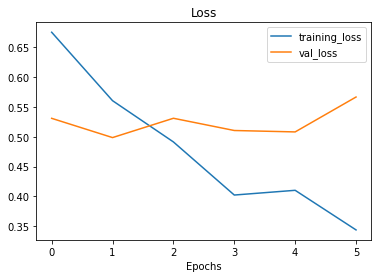

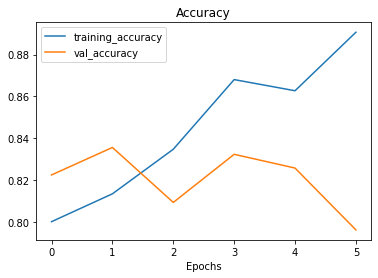

In [56]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [57]:
 def compare_historys(original_history , new_history , initial_epochs=5):

   acc = original_history.history["accuracy"]
   loss = original_history.history["loss"]

   val_acc = original_history.history["val_accuracy"]
   val_loss = original_history.history["val_loss"]

   total_acc = acc + new_history.history["accuracy"]
   total_loss = loss + new_history.history["loss"]

   total_val_acc = val_acc + new_history.history["val_accuracy"]
   total_val_loss = val_loss + new_history.history["val_loss"]

   plt.figure(figsize=(8,8))
   plt.subplot(2,1,1)
   plt.plot(total_acc , label="training acc")
   plt.plot(total_val_acc , label="val acc")
   plt.plot([initial_epochs-1 , initial_epochs-1] , plt.ylim() , label="start fine tuning")
   plt.legend(loc="lower right")
   plt.title("training and val acc")


   plt.figure(figsize=(8,8))
   plt.subplot(2,1,1)
   plt.plot(total_loss , label="training loss")
   plt.plot(total_val_loss , label="val loss")
   plt.plot([initial_epochs-1 , initial_epochs-1] , plt.ylim() , label="start fine tuning")
   plt.legend(loc="upper right")
   plt.title("training and val acc")

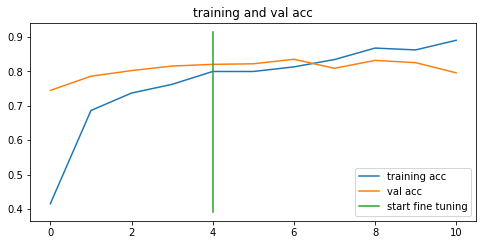

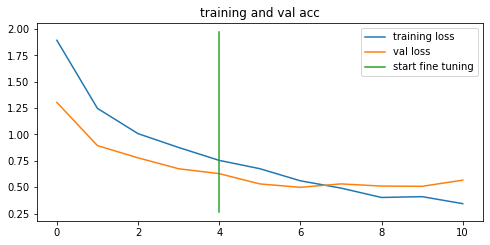

In [58]:
compare_historys(history_10_percent_data_aug , 
                 history_fine_10_percent_data_aug , 
                 initial_epochs=5)

In [64]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2021-07-13 16:04:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   118MB/s    in 5.4s    

2021-07-13 16:04:11 (92.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [65]:
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [66]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.

In [67]:
import tensorflow as tf 
IMG_SIZE = (224 , 224)
train_data_10_food_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data , 
                                                                                      label_mode = "categorical" , 
                                                                                      image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir , 
                                                                label_mode="categorical" , 
                                                                image_size = IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [68]:
model_2.evaluate(test_data)


79/79 [==============================] - 16s 197ms/step - loss: 0.5276 - accuracy: 0.8268


[0.527637243270874, 0.8267999887466431]

In [69]:
results_fine_tune_10_percent

[0.5276371836662292, 0.8267999887466431]

In [70]:
model_2.load_weights(checkpoint_path)

In [71]:
model_2.evaluate(test_data)

79/79 [==============================] - 16s 196ms/step - loss: 0.6324 - accuracy: 0.8220


[0.6324488520622253, 0.8220000267028809]

In [72]:
results_10_percent_data_aug

[0.6324488520622253, 0.8220000267028809]

In [73]:
for layer_number , layer in enumerate(model_2.layers):
  print(layer_number , layer.name , layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb4 True
3 global_avg_layer True
4 output_layer True


In [75]:
for layer_number , layer in enumerate(model_2.layers[2].layers):
  print(layer_number , layer.name , layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block1b_dwconv False
18 block1b_bn False
19 block1b_activation False
20 block1b_se_squeeze False
21 block1b_se_reshape False
22 block1b_se_reduce False
23 block1b_se_expand False
24 block1b_se_excite False
25 block1b_project_conv False
26 block1b_project_bn False
27 block1b_drop False
28 block1b_add False
29 block2a_expand_conv False
30 block2a_expand_bn False
31 block2a_expand_activation False
32 block2a_dwconv_pad False
33 block2a_dwconv False
34 block2a_bn False
35 block2a_activation False
36 block2a_se_squeeze False
37 block2a_se_reshape False
38 block2a_se_reduce False
39 block2a_s

In [78]:
model_2.compile(loss = "categorical_crossentropy" , 
                optimizer =tf.keras.optimizers.Adam(learning_rate = 0.0001) , 
                metrics=["accuracy"])

In [80]:
fine_tune_epochs = initial_epochs + 5 

history_fine_10_classes_full = model_2.fit(train_data_10_food_classes_full , 
                                               epochs = fine_tune_epochs , 
                                               validation_data = test_data , 
                                               validation_steps = int(0.25*len(test_data)) , 
                                               initial_epoch = history_10_percent_data_aug.epoch[-1] , 
                                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning" ,
                                                                                      experiment_name="full_10_classes_fine_tuning")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tuning/20210713-161125
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 92s 353ms/step - loss: 0.7381 - accuracy: 0.7617 - val_loss: 0.3580 - val_accuracy: 0.8750
Epoch 6/10
235/235 [==============================] - 104s 440ms/step - loss: 0.5982 - accuracy: 0.8021 - val_loss: 0.3218 - val_accuracy: 0.8931
Epoch 7/10
235/235 [==============================] - 94s 398ms/step - loss: 0.5358 - accuracy: 0.8252 - val_loss: 0.2878 - val_accuracy: 0.9095
Epoch 8/10
235/235 [==============================] - 92s 392ms/step - loss: 0.4761 - accuracy: 0.8416 - val_loss: 0.2421 - val_accuracy: 0.9260
Epoch 9/10
235/235 [==============================] - 87s 370ms/step - loss: 0.4377 - accuracy: 0.8529 - val_loss: 0.2863 - val_accuracy: 0.9145
Epoch 10/10
235/235 [==============================] - 82s 348ms/step - loss: 0.3950 - accuracy: 0.8683 - val_loss: 0.3176 - val_accuracy: 0.9062


In [81]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data


79/79 [==============================] - 16s 194ms/step - loss: 0.3179 - accuracy: 0.9040


[0.31789547204971313, 0.9039999842643738]

In [ ]:
compare_historys(original_history = history_10_percent_data_aug , 
                 new_history = history_fine_10_classes_full , 
                 initial_epochs = 5)